# LAB 6

Name: Mike Mico

StdID: 3685120

# House Sales in King County, USA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

You will require the following libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers


In [ ]:
# load the dataset
df = pd.read_csv('house_data.csv')

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# normalize the data
# a bit crude, but as long as we don't pick "nuisance" columns will be fine
df = (df - df.mean()) / df.std()

<ipython-input-6-dbee3d62a3bf>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = (df - df.mean()) / df.std()


In [ ]:
df.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,-1.447430,-0.398728,-0.629172,NaN,-0.915406,-0.558823,0.886126,-0.352564,-0.306072,-0.866697,...,-0.658666,-0.979812,-0.943333,-0.228316,-0.260709,-0.305752,-0.087171,-0.544885,-0.210124,1.870108
1,0.175603,-0.398728,-0.629172,NaN,0.936484,-0.558823,0.637496,1.161541,-0.746324,-0.005688,...,0.245136,0.533622,-0.432676,-0.189881,-0.187863,-0.305752,-0.087171,-0.681063,4.746568,0.879547
2,-1.447430,-1.473925,-0.629172,NaN,-0.915406,-1.409554,0.365435,1.283507,-0.135652,-0.980827,...,-0.658666,-1.426221,1.070115,-0.123296,-0.172371,-0.305752,-0.087171,-1.293862,-0.210124,-0.933367
3,1.149422,0.676469,2.444237,NaN,-0.915406,-0.558823,-0.727639,-0.283281,-1.271787,0.174086,...,1.397483,-0.130547,-0.914153,-0.244009,-0.284515,-0.305752,-0.087171,-0.204441,-0.210124,1.085135
4,-0.149004,-0.398728,-0.629172,NaN,-0.915406,0.291909,-0.912860,0.409541,1.199307,-0.081956,...,-0.658666,-0.435412,-0.272184,-0.169649,-0.192844,-0.305752,-0.087171,0.544535,-0.210124,-0.073634


In [ ]:
# split the dataset into training and testing sets

# start with two input features
train_data, test_data, train_targets, test_targets = train_test_split(
    df[['sqft_living15','condition']], df[['price']], test_size=0.2)


In [ ]:
# define a neural network with one hidden layer
model = models.Sequential()
# study these hyperparameters and experiment!
# try out different activation functions in particular
# change input_shape to match number of input variables
model.add(layers.Dense(64, activation='relu', input_shape=(2,)))
# only one layer
# figure out how to add more
model.add(layers.Dense(1))


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# train the model
history = model.fit(train_data, train_targets, epochs=100)

Epoch 1/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6314 - mae: 0.4947
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 0.5992 - mae: 0.4839
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.5958 - mae: 0.4824
Epoch 4/100
541/541 [==============================] - 1s 1ms/step - loss: 0.5949 - mae: 0.4820
Epoch 5/100
541/541 [==============================] - 1s 1ms/step - loss: 0.5946 - mae: 0.4825
Epoch 6/100
541/541 [==============================] - 1s 1ms/step - loss: 0.5945 - mae: 0.4814
Epoch 7/100
541/541 [==============================] - 1s 1ms/step - loss: 0.5938 - mae: 0.4817
Epoch 8/100
541/541 [==============================] - 1s 1ms/step - loss: 0.5931 - mae: 0.4815
Epoch 9/100
541/541 [==============================] - 1s 1ms/step - loss: 0.5928 - mae: 0.4817
Epoch 10/100
541/541 [==============================] - 1s 1ms/step - loss: 0.5934 - mae: 0.4815
Epoch 11/100
541/541 [=================

In [ ]:
# evaluate the performance of the model
test_loss, test_mae = model.evaluate(test_data, test_targets)

136/136 [==============================] - 0s 1ms/step - loss: 0.6811 - mae: 0.4927


# My modifications

#Attempt 1 : Using different combination of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   condition      21613 non-null  float64
 3   date           0 non-null      object 
 4   floors         21613 non-null  float64
 5   grade          21613 non-null  float64
 6   id             21613 non-null  float64
 7   lat            21613 non-null  float64
 8   long           21613 non-null  float64
 9   price          21613 non-null  float64
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  float64
 12  sqft_living    21613 non-null  float64
 13  sqft_living15  21613 non-null  float64
 14  sqft_lot       21613 non-null  float64
 15  sqft_lot15     21613 non-null  float64
 16  view           21613 non-null  float64
 17  waterfront     21613 non-null  float64
 18  yr_bui

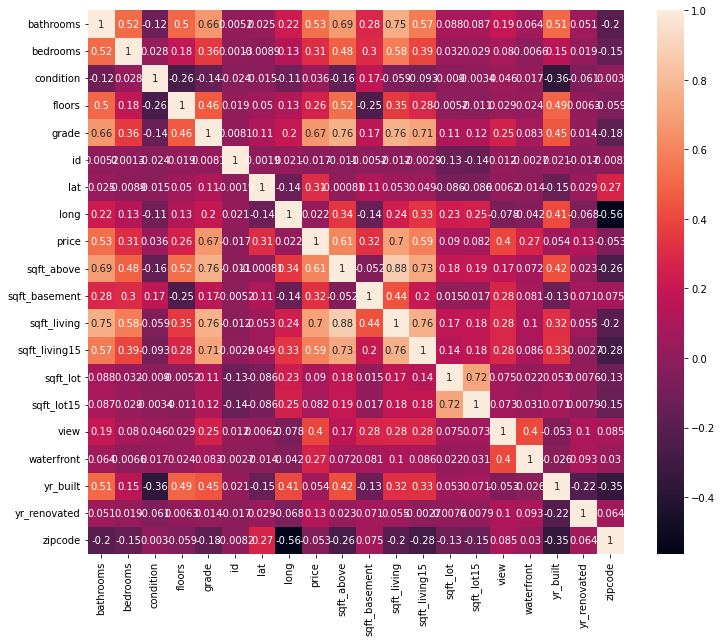

In [ ]:
# Correlation Matrix

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

df.info()

Use columns with high correlation to price

In [ ]:
df2= df[['bathrooms','grade','sqft_above','sqft_living','sqft_living15','price']]

In [ ]:
df2= df2.dropna()
df2

,bathrooms,grade,sqft_above,sqft_living,sqft_living15,price
0,-1.447430,-0.558823,-0.734664,-0.979812,-0.943333,-0.866697
1,0.175603,-0.558823,0.460803,0.533622,-0.432676,-0.005688
2,-1.447430,-1.409554,-1.229757,-1.426221,1.070115,-0.980827
3,1.149422,-0.558823,-0.891645,-0.130547,-0.914153,0.174086
4,-0.149004,0.291909,-0.130893,-0.435412,-0.272184,-0.081956
...,...,...,...,...,...,...
21608,0.500209,0.291909,-0.312024,-0.598732,-0.666119,-0.490533
21609,0.500209,0.291909,0.629859,0.250534,-0.228413,-0.381579
21610,-1.772037,-0.558823,-0.927871,-1.154021,-1.410220,-0.375856
21611,0.500209,0.291909,-0.227496,-0.522516,-0.841202,-0.381579


In [ ]:
# split the dataset into training and testing sets


# with 5 input features
train_data, test_data, train_targets, test_targets = train_test_split(
   df2[['bathrooms','grade','sqft_above','sqft_living','sqft_living15']], df2[['price']], test_size=0.2)

In [ ]:
# define a neural network with one hidden layer
model = models.Sequential()
# study these hyperparameters and experiment!
# try out different activation functions in particular
# change input_shape to match number of input variables
model.add(layers.Dense(64, activation='relu', input_shape=(5,)))
# only one layer
# figure out how to add more
model.add(layers.Dense(1))

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# train the model
history = model.fit(train_data, train_targets, epochs=100)

Epoch 1/100
541/541 [==============================] - 1s 1ms/step - loss: 0.4470 - mae: 0.4263
Epoch 2/100
541/541 [==============================] - 1s 1ms/step - loss: 0.3922 - mae: 0.4045
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3887 - mae: 0.4027
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3820 - mae: 0.4019
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3849 - mae: 0.4021
Epoch 6/100
541/541 [==============================] - 1s 1ms/step - loss: 0.3823 - mae: 0.4007
Epoch 7/100
541/541 [==============================] - 1s 1ms/step - loss: 0.3821 - mae: 0.4003
Epoch 8/100
541/541 [==============================] - 1s 1ms/step - loss: 0.3804 - mae: 0.3993
Epoch 9/100
541/541 [==============================] - 1s 1ms/step - loss: 0.3798 - mae: 0.3991
Epoch 10/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3805 - mae: 0.3988
Epoch 11/100
541/541 [=================

In [ ]:
# evaluate the performance of the model
test_loss, test_mae = model.evaluate(test_data, test_targets)

136/136 [==============================] - 0s 1ms/step - loss: 0.3990 - mae: 0.3897


# Increase epochs

In [ ]:
# train the model
history = model.fit(train_data, train_targets, epochs=150)

Epoch 1/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3581 - mae: 0.3906
Epoch 2/150
541/541 [==============================] - 1s 1ms/step - loss: 0.3582 - mae: 0.3899
Epoch 3/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3615 - mae: 0.3916
Epoch 4/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3592 - mae: 0.3900
Epoch 5/150
541/541 [==============================] - 1s 1ms/step - loss: 0.3588 - mae: 0.3908
Epoch 6/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3598 - mae: 0.3912
Epoch 7/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3595 - mae: 0.3907
Epoch 8/150
541/541 [==============================] - 1s 1ms/step - loss: 0.3589 - mae: 0.3907
Epoch 9/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3596 - mae: 0.3895
Epoch 10/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3585 - mae: 0.3911
Epoch 11/150
541/541 [=================

Increasing number of epochs Doesnt improve MAE very much

# Increasing number of neurons and adding two more layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(5,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(train_data, train_targets, epochs=100)

test_loss, test_mae = model.evaluate(test_data, test_targets)


Epoch 1/100
541/541 [==============================] - 2s 2ms/step - loss: 0.4153 - mae: 0.4166
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3903 - mae: 0.4031
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3832 - mae: 0.4010
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3805 - mae: 0.3998
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3797 - mae: 0.3986
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3826 - mae: 0.3985
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3778 - mae: 0.3974
Epoch 8/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3725 - mae: 0.3957
Epoch 9/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3722 - mae: 0.3955
Epoch 10/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3764 - mae: 0.3956
Epoch 11/100
541/541 [=================

# using a different activation function

- sigmoid

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='sigmoid', input_shape=(5,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(train_data, train_targets, epochs=100)

test_loss, test_mae = model.evaluate(test_data, test_targets)

Epoch 1/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4910 - mae: 0.4485
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4337 - mae: 0.4267
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4140 - mae: 0.4209
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4073 - mae: 0.4157
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4042 - mae: 0.4145
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4010 - mae: 0.4125
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3974 - mae: 0.4111
Epoch 8/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3947 - mae: 0.4089
Epoch 9/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3903 - mae: 0.4068
Epoch 10/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3932 - mae: 0.4078
Epoch 11/100
541/541 [=================

# Use all feautures

- use all but a few columns
- using sigmoid
- 3 layers 
- double the neurons
- increase epochs to 200

In [ ]:
df2 = df

In [ ]:
df2 = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','price']]

In [ ]:
df2 = df2.dropna()

In [ ]:
df2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.734664,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709,-0.866697
1,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,0.460803,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863,-0.005688
2,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,-0.629172,-1.409554,-1.229757,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371,-0.980827
3,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,2.444237,-0.558823,-0.891645,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515,0.174086
4,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,-0.629172,0.291909,-0.130893,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844,-0.081956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.087171,-0.305752,-0.629172,0.291909,-0.312024,-0.658666,1.293512,-0.210124,0.468371,1.004935,-0.938047,-0.666119,-0.412371,-0.490533
21609,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.087171,-0.305752,-0.629172,0.291909,0.629859,-0.658666,1.463734,-0.210124,1.272034,-0.356172,-1.051660,-0.228413,-0.203942,-0.381579
21610,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,-0.927871,-0.658666,1.293512,-0.210124,1.234654,0.247882,-0.604307,-1.410220,-0.394132,-0.375856
21611,-0.398728,0.500209,-0.522516,-0.307069,0.936484,-0.087171,-0.305752,-0.629172,0.291909,-0.227496,-0.658666,1.123290,-0.210124,-0.952056,-0.184410,1.028887,-0.841202,-0.420502,-0.381579


In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(
   df2[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']], df2[['price']], test_size=0.2)


In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='sigmoid', input_shape=(18,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(train_data, train_targets, epochs=200)

test_loss, test_mae = model.evaluate(test_data, test_targets)

Epoch 1/200
541/541 [==============================] - 1s 2ms/step - loss: 0.3390 - mae: 0.3529
Epoch 2/200
541/541 [==============================] - 1s 2ms/step - loss: 0.2560 - mae: 0.3184
Epoch 3/200
541/541 [==============================] - 1s 2ms/step - loss: 0.2275 - mae: 0.3013
Epoch 4/200
541/541 [==============================] - 1s 2ms/step - loss: 0.1995 - mae: 0.2799
Epoch 5/200
541/541 [==============================] - 1s 1ms/step - loss: 0.1763 - mae: 0.2578
Epoch 6/200
541/541 [==============================] - 1s 2ms/step - loss: 0.1608 - mae: 0.2438
Epoch 7/200
541/541 [==============================] - 1s 2ms/step - loss: 0.1508 - mae: 0.2389
Epoch 8/200
541/541 [==============================] - 1s 2ms/step - loss: 0.1441 - mae: 0.2342
Epoch 9/200
541/541 [==============================] - 1s 2ms/step - loss: 0.1414 - mae: 0.2314
Epoch 10/200
541/541 [==============================] - 1s 2ms/step - loss: 0.1372 - mae: 0.2266
Epoch 11/200
541/541 [=================